In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
from cv2 import resize, INTER_CUBIC
from PIL import Image as PILImage
from io import BytesIO

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# dowload images
(x_train, y_train), (x_test, y_test) = load_data()

## prepare images

# images are currently represented as values between 0 and 255
# for a NN, it's best to have them between 0 and 1
x_train = x_train/255
x_test = x_test/255

# changes the dimension, so the NN can better work with it
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## prepare labels

# labels are currently represented as a digit between 0 and 9
# for training the NN, it's best to represent them as an array of probabilities
# so 1 wold become [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

11493376/11490434 [==============================] - 0s 0us/step


In [30]:
# create the model
model = Sequential()

# needed, so the model knows how big the images are.
# this could also be replaced by `input_shape=(28, 28, 1)` as argument to the 
# first layer.
model.add(Input((28, 28, 1)))

# add 4 convolutional layers
# padding='same' prevents the image from shrinking
# padding='valid' doesn't
# you can paly around with the amount of layers and individual arguments
model.add(Conv2D(filters=10, activation='relu', kernel_size=(4, 4), padding='same'))
model.add(MaxPool2D(padding='valid'))
model.add(Conv2D(filters=10, activation='relu', kernel_size=(4, 4), padding='same'))
model.add(MaxPool2D(padding='valid'))
model.add(Conv2D(filters=10, activation='relu', kernel_size=(4, 4), padding='same'))
model.add(MaxPool2D(padding='valid'))
model.add(Conv2D(filters=10, activation='relu', kernel_size=(4, 4), padding='same'))
model.add(MaxPool2D(padding='valid'))

# needed to flatten the 2D image into 1D
model.add(Flatten())

# add 3 dense layers
# you can paly around with the amount of layers and individual arguments
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))

# there are 10 neurons, because we want to predict numbers between 0 and 9
# the last layer requires the `softmax` activation so all the values
# get converted to a probability
model.add(Dense(10, activation='softmax'))

# finaly compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 10)        170       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 10)        1610      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 10)          1610      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 10)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 10)         

In [34]:
# using 12 epochs is enought, since more won't lead to great performance improvements

# you can try out the effect of different epoch and batch_size values and check
# the results in the next cell

# note, that executing this cell multiple times, will train the same model
# multiple times (so 2 x this cell with 12 epochs, is like 24 epochs)
# therefore in most cases you should recompile the model by executing the cell
# above again

model.fit(x_train, y_cat_train, epochs=12, batch_size=1000,validation_data=(x_test,y_cat_test))

# saves the model progress
stats = pd.DataFrame(model.history.history)

Epoch 1/12
60/60 [==============================] - 1s 18ms/step - loss: 0.0787 - accuracy: 0.9750 - val_loss: 0.1233 - val_accuracy: 0.9629
Epoch 2/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0700 - accuracy: 0.9771 - val_loss: 0.0718 - val_accuracy: 0.9785
Epoch 3/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0630 - accuracy: 0.9797 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 4/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0788 - val_accuracy: 0.9756
Epoch 5/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 6/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 7/12
60/60 [==============================] - 1s 16ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9793
Epoch 8/12
60

loss: 0.05217667296528816
accuracy: 0.9853000044822693


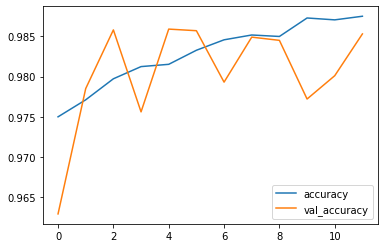

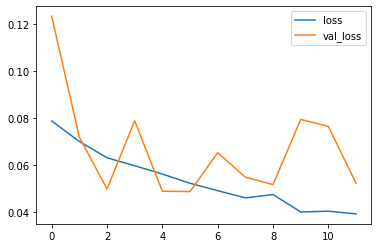

In [37]:
# check model performance on test data
for name, value in zip(model.metrics_names, model.evaluate(x_test,y_cat_test,verbose=0)):
  print(f"{name}: {value}")

# display model progress
stats[['accuracy', 'val_accuracy']].plot()
stats[['loss', 'val_loss']].plot()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



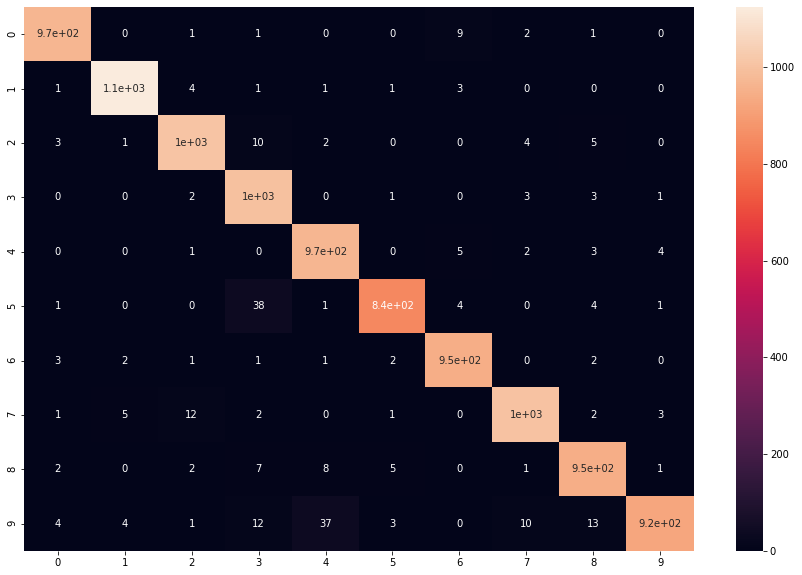

In [10]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [11]:
#@title # Initialize Testing suite

canvas_html = """
<canvas width=%d height=%d, style="border: 5px solid red;"></canvas>
<br>
<button>Finish</button>
<p id="result"></p>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(w=400, h=400, line_width=25):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  return binary

def to_gray(image):
  new = np.zeros((28, 28, 1))
  for x in range(0, 28):
    for y in range(0, 28):
      new[x, y] = image[x, y, 3]/255
  return new

[8]


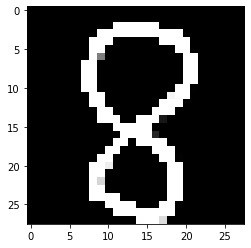

In [26]:
#@title # Test hand written digits

image = draw()

image = PILImage.open(BytesIO(image))
image = np.array(image)
image = resize(image, dsize=(28, 28), interpolation=INTER_CUBIC)
image = to_gray(image)
image = image.reshape((1, 28, 28, 1))

plt.imshow(image.reshape((28, 28)), cmap='gray')

res = model.predict_classes(image)
print(res)